We at:  0  with  9.1 % accuracy
We at:  100  with  24.5 % accuracy
We at:  200  with  30.2 % accuracy
We at:  300  with  32.5 % accuracy
We at:  400  with  36.0 % accuracy
We at:  500  with  39.5 % accuracy
We at:  600  with  42.2 % accuracy
We at:  700  with  45.8 % accuracy
We at:  800  with  48.6 % accuracy
We at:  900  with  50.8 % accuracy
We at:  1000  with  53.6 % accuracy
We at:  1100  with  55.2 % accuracy
We at:  1200  with  56.7 % accuracy
We at:  1300  with  59.0 % accuracy
We at:  1400  with  61.1 % accuracy
We at:  1500  with  63.0 % accuracy
We at:  1600  with  63.7 % accuracy
We at:  1700  with  65.9 % accuracy
We at:  1800  with  67.7 % accuracy
We at:  1900  with  69.6 % accuracy
We at:  2000  with  70.8 % accuracy
We at:  2100  with  71.8 % accuracy
We at:  2200  with  73.2 % accuracy
We at:  2300  with  75.2 % accuracy
We at:  2400  with  75.8 % accuracy
We at:  2500  with  76.3 % accuracy
We at:  2600  with  77.3 % accuracy
We at:  2700  with  80.1 % accuracy
We at

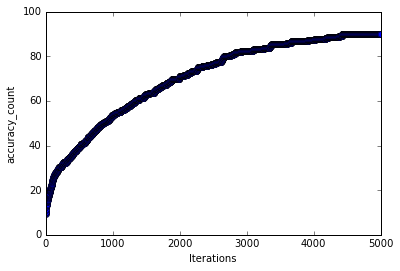

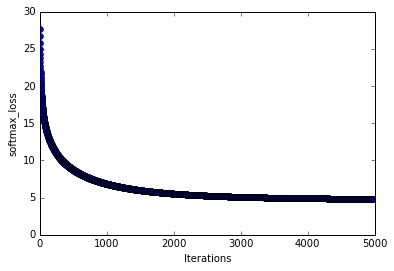

In [2]:
%matplotlib inline
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Steps
# 1 - Calculate the score
# 2 - Calculate the loss
# 3 - Calculate the gradient
# 4 - Update the parameters
class Basic_Network(object):
    def __init__(self, X, Y, classes, step=0.01, delta=0.000001, epochs=5000):
        self.step = step
        self.epochs = epochs
        self.classes = classes
        self.delta = delta
        self.X = X
        self.Y = Y


    def train(self):
        self.softmax_loss = []
        self.accuracy_count = []
        self.W = np.random.rand(self.classes, (1 + self.X.shape[1]))
        training_gradient_fun = grad(self.loss)

        for _ in range(self.epochs):
            ag = training_gradient_fun(self.W)
            self.W -= self.step * ag

            loss_function_value = self.loss(self.W)
            self.softmax_loss.append(loss_function_value)
            a = self.accuracy(self.W)
            self.accuracy_count.append(a)

            if (_ % 100 == 0):
                print 'We at: ', _, ' with ', a, '% accuracy'

        return self


    def auto_gradient(self, W):
        return grad(self.loss(W))


    def gradient(self, W):
        # evaluate function value at original point
        fx = self.loss(W)
        gradient = np.zeros(W.shape)
        # iterate over all indexes in x
        it = np.nditer(W, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            # evaluate function at x+h
            ix = it.multi_index
            old_value = W[ix]
            # increment by delta
            W[ix] = old_value + self.delta
            # evalute f(x + h)
            fxh = self.loss(W)
            # restore to previous value
            W[ix] = old_value
            # compute the partial derivative
            gradient[ix] = (fxh - fx) / self.delta # the slope
            it.iternext() # step to next dimension

        return fx, gradient



    def accuracy(self, W):
        scores = self.score(W)
        correct = np.equal(self.Y.T, [np.argmax(scores, axis=1)])
        return np.sum(correct) / float(self.Y.shape[0]) *100


    def score(self, W):
        return np.dot(np.array(self.X), W[:, 1:].T) + W[:,0]


    def loss(self, W):
        # first shift the values of f so that the highest number is 0:
        scores = self.score(W)
        scores -= np.array([np.amax(scores, axis=1)]).T
        # raise to e^x
        ex = np.exp(scores)
        # normalize to 1
        nex = ex / ex.sum(axis=0)
        nexln = -np.log(nex)
        one_hot_array = np.zeros(nexln.shape)
        one_hot_array[np.arange(self.X.shape[0]), np.array(self.Y).T] = 1

        # find average loss of all
        return ((nexln * one_hot_array)).flatten().sum() / self.Y.shape[0]



# =============================================
#
# load cifar-10-small and project down
#

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

data = unpickle( 'cifar-10-batches-py/data_batch_1' )

features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T

N = 1000
D = 10

# only keep N items
features = features[ 0:N, : ]
labels = labels[ 0:N, : ]

# project down into a D-dimensional space
# features = np.dot( features, np.random.randn( 3072, D))

# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features)) / np.std(features)


bn = Basic_Network(X=features, Y=labels, classes=10)
bn.train()

# print('Weights: %s' % bn.w_)

plt.plot(range(1, len(bn.accuracy_count) + 1), bn.accuracy_count, marker='o')
plt.xlabel('Iterations')
plt.ylabel('accuracy_count')
plt.show()

plt.plot(range(1, len(bn.softmax_loss) + 1), bn.softmax_loss, marker='o')
plt.xlabel('Iterations')
plt.ylabel('softmax_loss')
plt.show()